In [10]:
import numpy as np
import pandas as pd


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#source: https://data.cms.gov/provider-data/dataset/84jm-wiui
hospital_df= pd.read_csv('datasets/HCAHPS-State.csv')

In [12]:
hospital_df.head()

,State,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,HCAHPS Answer Percent,Footnote,Start Date,End Date
0,AK,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",78,NaN,07/01/2020,03/31/2021
1,AK,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",4,NaN,07/01/2020,03/31/2021
2,AK,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",18,NaN,07/01/2020,03/31/2021
3,AK,H_NURSE_RESPECT_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" treated them with courtesy and...",87,NaN,07/01/2020,03/31/2021
4,AK,H_NURSE_RESPECT_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" treated them wit...",2,NaN,07/01/2020,03/31/2021


In [13]:
print(len(hospital_df))

4032


In [14]:
hospital_df.columns

Index(['State', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'HCAHPS Answer Percent', 'Footnote',
       'Start Date', 'End Date'],
      dtype='object')

# Explore data

In [15]:
hospital_df['State'].nunique()

56

In [16]:
#different 
hospital_df['HCAHPS Measure ID'].nunique()

72

In [42]:
hospital_df['HCAHPS Answer Percent'].unique()

array(['78', '4', '18', '87', '2', '11', '74', '5', '21', '73', '6', '17',
       '86', '3', '76', '71', '23', '63', '12', '25', '65', '8', '27',
       '62', '20', '72', '10', '53', '26', '88', '13', '89', '43', '52',
       '48', '46', '44', '50', '32', '59', '28', '7', '70', '81', '14',
       '85', '16', '83', '82', '79', '15', '69', '19', '68', '66', '9',
       '42', '47', '45', '38', '57', '80', '77', '22', '30', '51', '49',
       '37', '58', 'Not Available', '84', '61', '24', '60', '40', '56',
       '67', '75', '39', '55', '90', '41', '54', '35', '33', '29', '64',
       '36', '34', '91', '31', '1'], dtype=object)

In [45]:
hospital_df.replace('Not Available',0,inplace=True)

In [46]:
hospital_df['HCAHPS Answer Percent'].unique()

array(['78', '4', '18', '87', '2', '11', '74', '5', '21', '73', '6', '17',
       '86', '3', '76', '71', '23', '63', '12', '25', '65', '8', '27',
       '62', '20', '72', '10', '53', '26', '88', '13', '89', '43', '52',
       '48', '46', '44', '50', '32', '59', '28', '7', '70', '81', '14',
       '85', '16', '83', '82', '79', '15', '69', '19', '68', '66', '9',
       '42', '47', '45', '38', '57', '80', '77', '22', '30', '51', '49',
       '37', '58', 0, '84', '61', '24', '60', '40', '56', '67', '75',
       '39', '55', '90', '41', '54', '35', '33', '29', '64', '36', '34',
       '91', '31', '1'], dtype=object)

In [54]:
type(hospital_df['HCAHPS Answer Percent'][0])

str

In [55]:
hospital_df['HCAHPS Answer Percent']= hospital_df['HCAHPS Answer Percent'].apply(lambda x: int(x))

In [56]:
type(hospital_df['HCAHPS Answer Percent'][0])

numpy.int64

In [47]:
hospital_df['HCAHPS Measure ID'].unique()

array(['H_COMP_1_A_P', 'H_COMP_1_SN_P', 'H_COMP_1_U_P',
       'H_NURSE_RESPECT_A_P', 'H_NURSE_RESPECT_SN_P',
       'H_NURSE_RESPECT_U_P', 'H_NURSE_LISTEN_A_P', 'H_NURSE_LISTEN_SN_P',
       'H_NURSE_LISTEN_U_P', 'H_NURSE_EXPLAIN_A_P',
       'H_NURSE_EXPLAIN_SN_P', 'H_NURSE_EXPLAIN_U_P', 'H_COMP_2_A_P',
       'H_COMP_2_SN_P', 'H_COMP_2_U_P', 'H_DOCTOR_RESPECT_A_P',
       'H_DOCTOR_RESPECT_SN_P', 'H_DOCTOR_RESPECT_U_P',
       'H_DOCTOR_LISTEN_A_P', 'H_DOCTOR_LISTEN_SN_P',
       'H_DOCTOR_LISTEN_U_P', 'H_DOCTOR_EXPLAIN_A_P',
       'H_DOCTOR_EXPLAIN_SN_P', 'H_DOCTOR_EXPLAIN_U_P', 'H_COMP_3_A_P',
       'H_COMP_3_SN_P', 'H_COMP_3_U_P', 'H_CALL_BUTTON_A_P',
       'H_CALL_BUTTON_SN_P', 'H_CALL_BUTTON_U_P', 'H_BATH_HELP_A_P',
       'H_BATH_HELP_SN_P', 'H_BATH_HELP_U_P', 'H_COMP_5_A_P',
       'H_COMP_5_SN_P', 'H_COMP_5_U_P', 'H_MED_FOR_A_P', 'H_MED_FOR_SN_P',
       'H_MED_FOR_U_P', 'H_SIDE_EFFECTS_A_P', 'H_SIDE_EFFECTS_SN_P',
       'H_SIDE_EFFECTS_U_P', 'H_COMP_6_N_P', 'H_COMP_6_Y_

In [48]:
hospital_df['HCAHPS Answer Description'].unique()

array(['Nurses "always" communicated well',
       'Nurses "sometimes" or "never" communicated well',
       'Nurses "usually" communicated well',
       'Nurses "always" treated them with courtesy and  respect',
       'Nurses "sometimes" or "never" treated them with courtesy and  respect',
       'Nurses "usually"  treated them with courtesy and  respect',
       'Nurses "always" listened carefully',
       'Nurses "sometimes" or "never" listened carefully',
       'Nurses "usually" listened carefully',
       'Nurses "always" explained things so they could understand',
       'Nurses "sometimes" or "never" explained things so they could understand',
       'Nurses "usually" explained things so they could understand',
       'Doctors "always" communicated well',
       'Doctors "sometimes" or "never" communicated well',
       'Doctors "usually" communicated well',
       'Doctors "always" treated them with courtesy and  respect',
       'Doctors "sometimes" or "never" treated them w

In [64]:
#dict of 'HCAHPS Answer Description' and 'HCAHPS Measure ID' to translate IDs
hcahps_dict= dict(zip(hospital_df['HCAHPS Measure ID'],hospital_df['HCAHPS Answer Description']))

In [65]:
sns.set_style('dark')

In [66]:
hospital_df.groupby('State')['HCAHPS Answer Percent'].mean().sort_values(ascending=False)

State
WY    34.722222
ID    34.722222
MO    34.722222
MN    34.722222
MI    34.722222
ME    34.722222
MD    34.722222
MA    34.722222
LA    34.722222
KY    34.722222
KS    34.722222
IN    34.722222
IL    34.722222
IA    34.722222
MS    34.722222
HI    34.722222
GA    34.722222
FL    34.722222
DE    34.722222
DC    34.722222
CT    34.722222
CO    34.722222
CA    34.722222
AZ    34.722222
AR    34.722222
AL    34.722222
WV    34.722222
AK    34.722222
MT    34.722222
PR    34.722222
WI    34.722222
WA    34.722222
VT    34.722222
VA    34.722222
UT    34.722222
TX    34.722222
TN    34.722222
SD    34.722222
SC    34.722222
NC    34.722222
RI    34.722222
PA    34.722222
OR    34.722222
OK    34.722222
OH    34.722222
NY    34.722222
NV    34.722222
NM    34.722222
NJ    34.722222
NH    34.722222
NE    34.722222
ND    34.722222
GU     0.000000
VI     0.000000
AS     0.000000
MP     0.000000
Name: HCAHPS Answer Percent, dtype: float64

In [32]:
hospital_df.groupby('HCAHPS Measure ID')['HCAHPS Answer Description'].count().sort_values(ascending=False)

HCAHPS Measure ID
H_SYMPTOMS_Y_P       56
H_SYMPTOMS_N_P       56
H_COMP_5_SN_P        56
H_COMP_5_U_P         56
H_COMP_6_N_P         56
                     ..
H_HSP_RATING_9_10    56
H_MED_FOR_A_P        56
H_MED_FOR_SN_P       56
H_MED_FOR_U_P        56
H_BATH_HELP_A_P      56
Name: HCAHPS Answer Description, Length: 72, dtype: int64

In [59]:
hospital_df.groupby('HCAHPS Measure ID')['HCAHPS Answer Percent'].count().sort_values(ascending=False)

HCAHPS Measure ID
H_SYMPTOMS_Y_P       56
H_SYMPTOMS_N_P       56
H_COMP_5_SN_P        56
H_COMP_5_U_P         56
H_COMP_6_N_P         56
                     ..
H_HSP_RATING_9_10    56
H_MED_FOR_A_P        56
H_MED_FOR_SN_P       56
H_MED_FOR_U_P        56
H_BATH_HELP_A_P      56
Name: HCAHPS Answer Percent, Length: 72, dtype: int64

In [60]:
hospital_df.groupby('HCAHPS Measure ID')['HCAHPS Answer Percent'].mean().sort_values(ascending=False)

HCAHPS Measure ID
H_SYMPTOMS_Y_P           81.750000
H_DOCTOR_RESPECT_A_P     80.517857
H_NURSE_RESPECT_A_P      80.339286
H_COMP_6_Y_P             80.196429
H_DISCH_HELP_Y_P         78.285714
                           ...    
H_COMP_2_SN_P             4.625000
H_CT_MED_D_SD             4.625000
H_COMP_1_SN_P             4.214286
H_DOCTOR_RESPECT_SN_P     3.250000
H_NURSE_RESPECT_SN_P      2.982143
Name: HCAHPS Answer Percent, Length: 72, dtype: float64

In [70]:
hcahps_dict.keys()

dict_keys(['H_COMP_1_A_P', 'H_COMP_1_SN_P', 'H_COMP_1_U_P', 'H_NURSE_RESPECT_A_P', 'H_NURSE_RESPECT_SN_P', 'H_NURSE_RESPECT_U_P', 'H_NURSE_LISTEN_A_P', 'H_NURSE_LISTEN_SN_P', 'H_NURSE_LISTEN_U_P', 'H_NURSE_EXPLAIN_A_P', 'H_NURSE_EXPLAIN_SN_P', 'H_NURSE_EXPLAIN_U_P', 'H_COMP_2_A_P', 'H_COMP_2_SN_P', 'H_COMP_2_U_P', 'H_DOCTOR_RESPECT_A_P', 'H_DOCTOR_RESPECT_SN_P', 'H_DOCTOR_RESPECT_U_P', 'H_DOCTOR_LISTEN_A_P', 'H_DOCTOR_LISTEN_SN_P', 'H_DOCTOR_LISTEN_U_P', 'H_DOCTOR_EXPLAIN_A_P', 'H_DOCTOR_EXPLAIN_SN_P', 'H_DOCTOR_EXPLAIN_U_P', 'H_COMP_3_A_P', 'H_COMP_3_SN_P', 'H_COMP_3_U_P', 'H_CALL_BUTTON_A_P', 'H_CALL_BUTTON_SN_P', 'H_CALL_BUTTON_U_P', 'H_BATH_HELP_A_P', 'H_BATH_HELP_SN_P', 'H_BATH_HELP_U_P', 'H_COMP_5_A_P', 'H_COMP_5_SN_P', 'H_COMP_5_U_P', 'H_MED_FOR_A_P', 'H_MED_FOR_SN_P', 'H_MED_FOR_U_P', 'H_SIDE_EFFECTS_A_P', 'H_SIDE_EFFECTS_SN_P', 'H_SIDE_EFFECTS_U_P', 'H_COMP_6_N_P', 'H_COMP_6_Y_P', 'H_DISCH_HELP_N_P', 'H_DISCH_HELP_Y_P', 'H_SYMPTOMS_N_P', 'H_SYMPTOMS_Y_P', 'H_COMP_7_A', 'H_COMP

In [72]:
#use dict for translating ID code
print(hcahps_dict['H_COMP_6_N_P'])
print(hcahps_dict['H_SYMPTOMS_N_P'])
print(hcahps_dict['H_BATH_HELP_A_P'])
print(hcahps_dict['H_RECMND_DN'])
print(hcahps_dict['H_RECMND_DY'])
print(hcahps_dict['H_RECMND_PY'])

No, staff "did not" give patients this information
No, staff "did not" give patients information about possible symptoms
Patients "always" received bathroom help as soon as they wanted
"NO", patients would not recommend the hospital (they probably would not or definitely would not recommend it)
"YES", patients would definitely recommend the hospital
"YES", patients would probably recommend the hospital


# Get wanted df slice 

In [73]:
#get slice of state where patients will definitately and probably the hospital

recommeded_df= hospital_df.loc[(hospital_df['HCAHPS Measure ID']=='H_RECMND_DY') | (hospital_df['HCAHPS Measure ID']=='H_RECMND_PY') ]

In [74]:
len(recommeded_df)

112

In [75]:
recommeded_df.head()

,State,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,HCAHPS Answer Percent,Footnote,Start Date,End Date
70,AK,H_RECMND_DY,"Patients who reported YES, they would definite...","""YES"", patients would definitely recommend the...",70,NaN,07/01/2020,03/31/2021
71,AK,H_RECMND_PY,"Patients who reported YES, they would probably...","""YES"", patients would probably recommend the h...",26,NaN,07/01/2020,03/31/2021
142,AL,H_RECMND_DY,"Patients who reported YES, they would definite...","""YES"", patients would definitely recommend the...",69,NaN,07/01/2020,03/31/2021
143,AL,H_RECMND_PY,"Patients who reported YES, they would probably...","""YES"", patients would probably recommend the h...",25,NaN,07/01/2020,03/31/2021
214,AR,H_RECMND_DY,"Patients who reported YES, they would definite...","""YES"", patients would definitely recommend the...",69,NaN,07/01/2020,03/31/2021


In [88]:
recommeded_df.columns

Index(['State', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'HCAHPS Answer Percent', 'Footnote',
       'Start Date', 'End Date'],
      dtype='object')

<Figure size 1440x432 with 0 Axes>

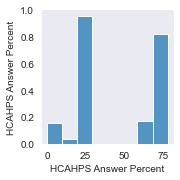

In [86]:
#state with most recommened hospitals
plt.figure(figsize=(20,6))
sns.pairplot(recommeded_df.drop('Footnote',axis=1))

<Figure size 1440x432 with 0 Axes>

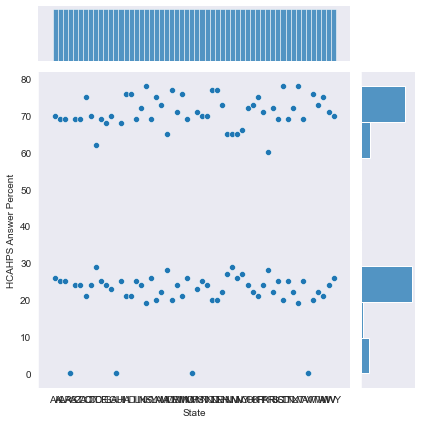

In [89]:
plt.figure(figsize=(20,6))
sns.jointplot(x='State', y= 'HCAHPS Answer Percent',data=recommeded_df)


set standard for 